# im2_db

In [83]:
import os
# set working directory
working_directory =  r"C:/Users/PC/Documents/moringa/Project Phase 1"
os.chdir(working_directory)

Objectives
1. what are the popular genres in the Movie Industry?
2. What is the relationship between average rating and number of votes?
3. What is the trend of the number of votes over the years
4. What is the trend of the average rating over the years
5. Why average rating and number of votes are moving in different direction with respect to time 










In [84]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import csv
import os
import zipfile

In [85]:
im=os.path.join('im2.db')
conn=sqlite3.connect(im)
cursor=conn.cursor()

In [45]:
table_name_query="""SELECT name
                    AS 'Table Names'
                    From sqlite_master
                    WHERE type='table';"""
pd.read_sql(table_name_query,conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [46]:
# Query the relevant tables
movie_basics_query = """
SELECT *
FROM movie_basics;
"""

movie_ratings_query = """
SELECT *
FROM movie_ratings;
"""
df_movie_basics_query = pd.read_sql(movie_basics_query, conn)
df_movie_ratings_query = pd.read_sql(movie_ratings_query, conn)




In [47]:
# Display the tables above each other
df_movie_basics = pd.read_sql(movie_basics_query, conn)
df_movie_ratings = pd.read_sql(movie_ratings_query, conn)


In [48]:
df_movie_basics = pd.DataFrame(df_movie_basics)
df_movie_basics.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [49]:
print(df_movie_basics.shape)
print(df_movie_ratings.shape)

(146144, 6)
(73856, 3)


In [50]:
df_movie_ratings = pd.DataFrame(df_movie_ratings)
df_movie_ratings.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

In [51]:
df_combined = pd.concat([df_movie_basics, df_movie_ratings], axis = 1)
# print(df_combined)
df_combined = pd.DataFrame(df_combined)
df_combined.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,NaN,NaN,NaN


In [52]:
pd.merge(df_movie_basics, df_movie_ratings, how = 'left', on = 'movie_id')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [53]:
print(df_movie_basics.info())
print(df_movie_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [54]:
# check missing values
print(df_movie_basics.isnull().sum())
print(df_movie_ratings.isnull().sum())

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64


In [55]:
# handle missing values
df_movie_basics =df_movie_basics.dropna()
df_movie_ratings =df_movie_ratings.dropna()
df_movie_basics
df_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [56]:
df_movie_basics.describe()


,start_year,runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


In [57]:
df_movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [58]:
merged_df = pd.merge(df_movie_basics, df_movie_ratings, on='movie_id', how = 'left')
# identify top 10 genres
all_genres = merged_df['genres'].str.split(',', expand = True).stack()
top_genres = all_genres.value_counts().head(5)
# display the list of the first top 10 genres
print("top 5 Genres:")
print(top_genres.index.tolist())


top 5 Genres:
['Documentary', 'Drama', 'Comedy', 'Thriller', 'Horror']


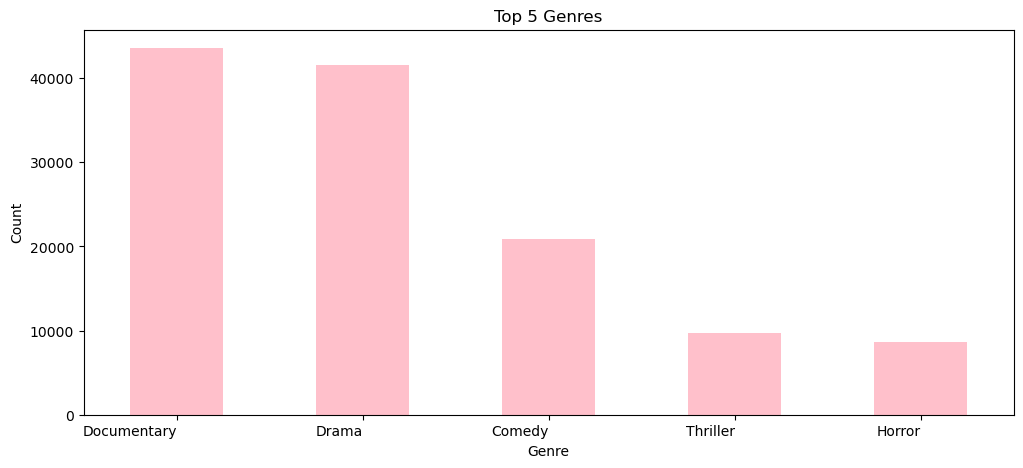

In [59]:
# visualize the most common genres
plt.figure(figsize = (12, 5))
ax = top_genres.plot(kind ='bar', color = 'pink')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, ha ='right')
plt.title('Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.savefig('fig1.png')
plt.show()

In [60]:
merged_df = pd.merge(df_movie_basics, df_movie_ratings, on='movie_id', how = 'left')
# identify last 5 genres
all_genres = merged_df['genres'].str.split(',', expand = True).stack()
last_genres = all_genres.value_counts().tail(5)
# display the list of the first last 5 genres
print("last 5 Genres:")
print(last_genres.index.tolist())


last 5 Genres:
['Reality-TV', 'Talk-Show', 'Short', 'Adult', 'Game-Show']


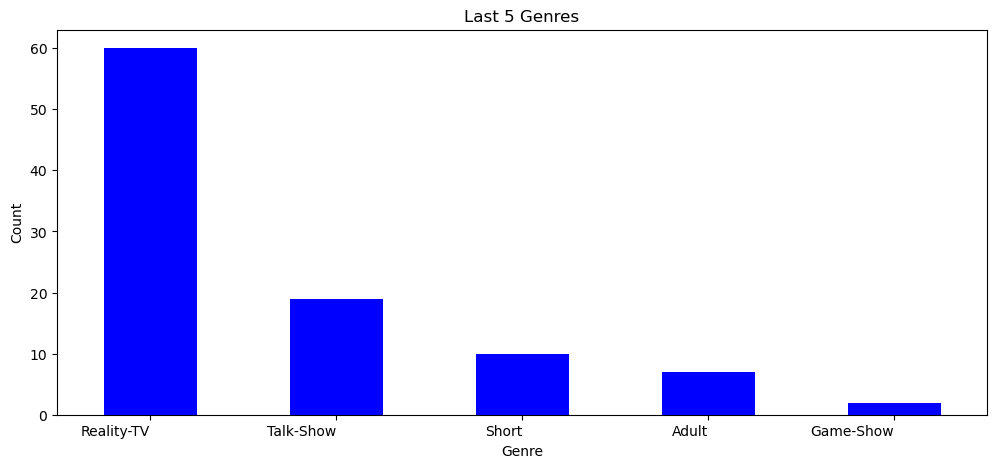

In [61]:
# visualize the last genres
plt.figure(figsize = (12, 5))
ax = last_genres.plot(kind ='bar', color = 'blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, ha ='right')
plt.title('Last 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.savefig('fig2.png')
plt.show()

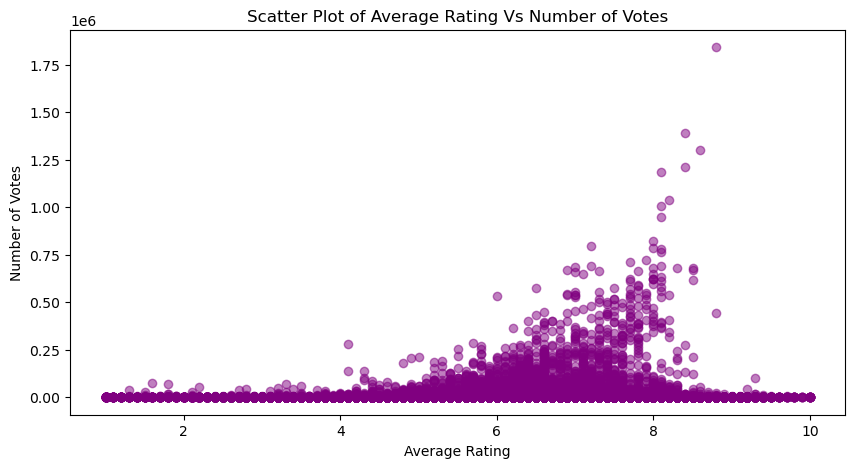

In [62]:
# select relevant columns for the scatter plot
scatter_data = merged_df[['averagerating', 'numvotes']]
# create a scatter plot
plt.figure(figsize = (10, 5))
plt.scatter(scatter_data['averagerating'], scatter_data['numvotes'], alpha=0.5, color = 'purple')
plt.title('Scatter Plot of Average Rating Vs Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.savefig('fig3.png')
plt.show()



In [63]:
print(df_movie_basics.genres.unique())
# print(df_movie_ratings.genres.unique())

['Action,Crime,Drama' 'Biography,Drama' 'Drama' ...
 'Mystery,Reality-TV,Thriller' 'Music,Musical,Reality-TV' 'Family,War']


In [64]:
# Group the data by start_year and calculating the average rating and total number of votes
grouped_data = merged_df.groupby('start_year').agg({'averagerating': 'mean', 'numvotes': 'mean'})
# Sorting the data by start_ year in ascending order
grouped_data = grouped_data.sort_values('start_year')
print(grouped_data)

            averagerating     numvotes
start_year                            
2010             6.267108  5043.330407
2011             6.290523  4999.282024
2012             6.291509  4761.220652
2013             6.292406  4933.784507
2014             6.321108  4562.855340
2015             6.265817  3415.804183
2016             6.328285  3414.603597
2017             6.363825  2832.789971
2018             6.375993  2505.006998
2019             6.653492  1696.149113
2020                  NaN          NaN
2021                  NaN          NaN
2022                  NaN          NaN


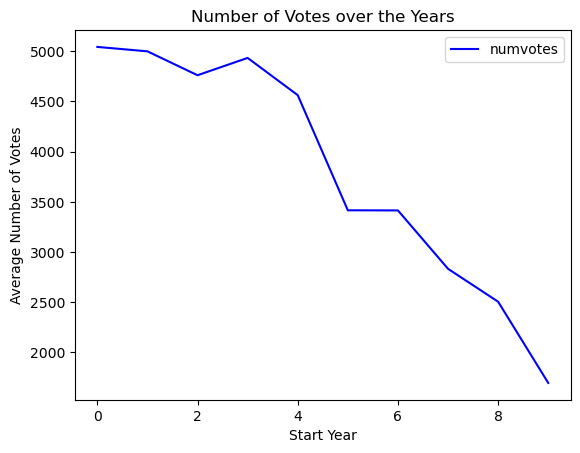

In [65]:

C=grouped_data
plt.plot(np.arange(0,len(C)),C["numvotes"],color="blue",label="numvotes")
# plt a line graph
plt.title("Number of Votes over the Years")
plt.xlabel("Start Year")
plt.ylabel("Average Number of Votes")
plt.legend()
plt.savefig('fig4.png')
plt.show()

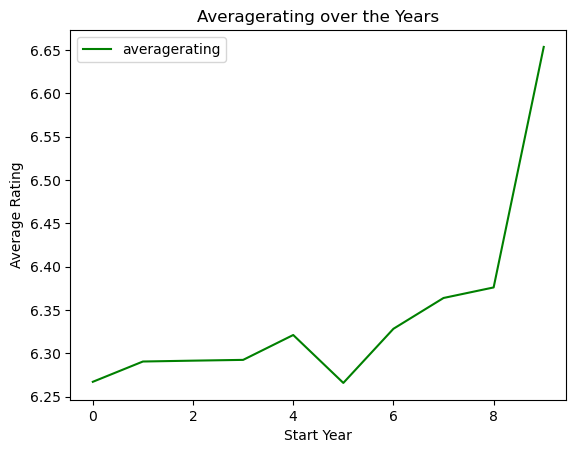

In [66]:
C=grouped_data
plt.plot(np.arange(0,len(C)),C["averagerating"],color="green",label="averagerating")
# plt a line graph
plt.title("Averagerating over the Years")
plt.xlabel("Start Year")
plt.ylabel("Average Rating")
plt.legend()
plt.savefig('fig5.png')
plt.show()

# bom_movie_gross_csv




Objectives for bom_movie_gross_csv
1. what is the realtionship between domestic gross and foreign gross?
2. What is the trend for domestic gross and foreign gross over the years
3. Is theer any outliers in the gross revenue?
4. Is there any significant difference between the domestic and foreign revenue over the years?

In [67]:
# load the data
df =pd.read_csv('bom.movie1_gross.csv')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [68]:
df.shape

(3387, 5)

In [69]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [71]:
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [72]:
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [73]:
# check missing values
print(df.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [74]:
# handle missing values
df =df.dropna()
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
df.describe()

,domestic_gross,year
count,2.007000e+03,2007.000000
mean,4.701984e+07,2013.506228
std,8.162689e+07,2.597997
min,4.000000e+02,2010.000000
25%,6.700000e+05,2011.000000
50%,1.670000e+07,2013.000000
75%,5.605000e+07,2016.000000
max,9.367000e+08,2018.000000


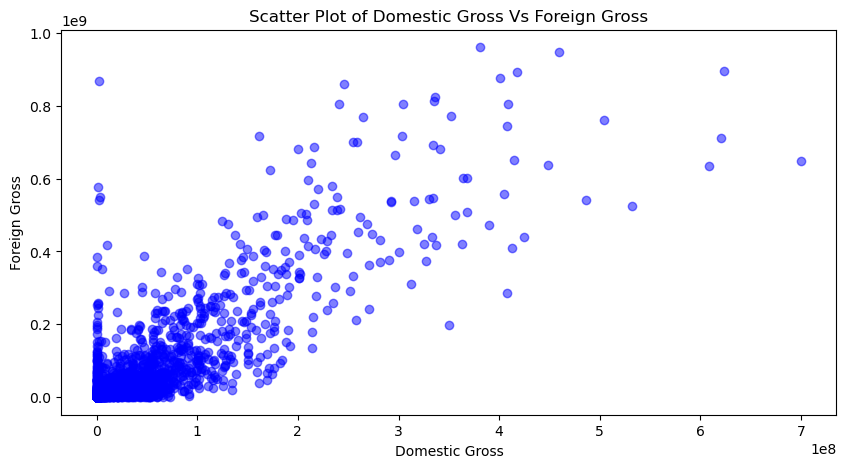

In [77]:
df ['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors = 'coerce')
df ['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors = 'coerce')
# create a scatter plot
plt.figure(figsize = (10, 5))
plt.scatter(df['domestic_gross'], df['foreign_gross'], alpha=0.5, color = 'blue')
plt.title('Scatter Plot of Domestic Gross Vs Foreign Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.savefig('fig3.png')
plt.show()

In [78]:
# DataFrame for domestic_gross and foreign_gross 
domestic_data = df.domestic_gross
foreign_data = df.foreign_gross
# display the data for the domestic_gross column
print("Domestic Gross Data:")
print(domestic_data)
# display the data for foreign_gross column
print("\nForeign Gross Data:")
print(foreign_data)


Domestic Gross Data:
0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3275         1400.0
3286       725000.0
3309        10000.0
3342        93200.0
3353        43200.0
Name: domestic_gross, Length: 2007, dtype: float64

Foreign Gross Data:
0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3275      1500000.0
3286       229000.0
3309       256000.0
3342         5200.0
3353        30000.0
Name: foreign_gross, Length: 2007, dtype: float64


In [79]:
df1 = df.groupby(['year'])[['domestic_gross', 'foreign_gross']].sum().reset_index()
df1.head()

,year,domestic_gross,foreign_gross
0,2010,1.015274e+10,1.436937e+10
1,2011,9.915690e+09,1.566287e+10
2,2012,1.069786e+10,1.700298e+10
3,2013,1.055885e+10,1.658024e+10
4,2014,1.014798e+10,1.695667e+10


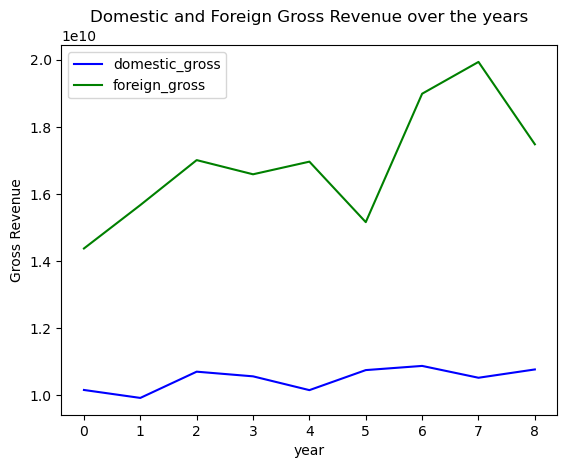

In [80]:
C=df1
plt.plot(np.arange(0,len(C)),C["domestic_gross"],color="blue",label="domestic_gross")
plt.plot(np.arange(0,len(C)),C["foreign_gross"],color="green",label="foreign_gross")
# plt a line graph
plt.title("Domestic and Foreign Gross Revenue over the years")
plt.xlabel("year")
plt.ylabel("Gross Revenue")
plt.legend()
plt.savefig('fig7.png')
plt.show()

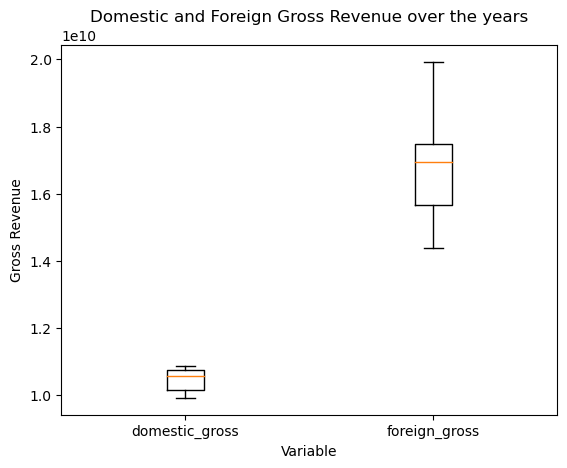

In [81]:
C=df1
plt.boxplot([df1["domestic_gross"], df1["foreign_gross"]], labels = ["domestic_gross", "foreign_gross"])
# plt.boxplot
plt.title("Domestic and Foreign Gross Revenue over the years")
plt.xlabel("Variable")
plt.ylabel("Gross Revenue")
plt.savefig('fig8.png')
plt.show()

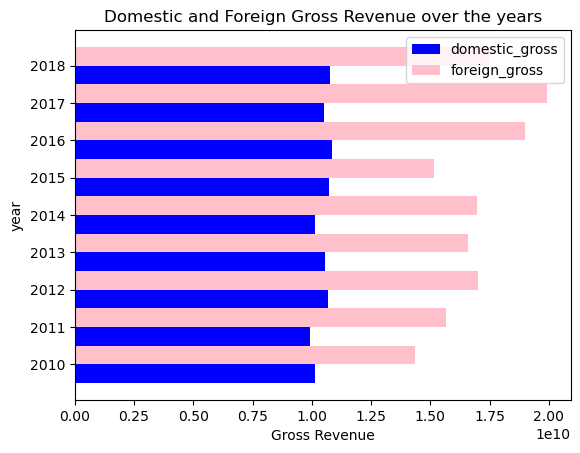

In [82]:
df1 = df.groupby(['year'])[['domestic_gross', 'foreign_gross']].sum().reset_index()
C=df1
# convert the "year" column to datetime and extract the year
bar_width = 0.5
plt.barh(np.arange(len(df1)), df1["domestic_gross"], height = bar_width, color ="blue", label ="domestic_gross") 
plt.barh(np.arange(len(df1)) + bar_width, df1["foreign_gross"], height = bar_width, color ="pink", label ="foreign_gross")
# set y-axis ticks and labels
plt.yticks(np.arange(len(df1)) + bar_width / 2, df1["year"])
plt.title("Domestic and Foreign Gross Revenue over the years")
plt.xlabel("Gross Revenue")
plt.ylabel("year")
plt.legend()
plt.savefig('fig9.png')
plt.show()